# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
group_dict = {0:'2 to 17',
          1:'18 to 24',
          2:'25 to 29',
          3:'30 to 40',
          4:'40 to 54',
          5:'55 to 80'
}

In [4]:
all_file_df = pd.read_csv('files.csv')
aaf_file_df = pd.read_csv('aaf_files.csv')
utk_file_df = pd.read_csv('utk_files.csv')

In [5]:
file_df_rep = all_file_df.replace({'Group': group_dict})
aaf_file_df_rep = aaf_file_df.replace({'Group': group_dict})
utk_file_df_rep = utk_file_df.replace({'Group': group_dict})

In [6]:
age_breakdown = file_df_rep['Age'].value_counts()
aaf_age_breakdown = aaf_file_df_rep['Age'].value_counts()
utk_age_breakdown = utk_file_df_rep['Age'].value_counts()

In [7]:
def bar_plot(x_data, x_label, y_data, y_label, title='Age Distribution'):
    plt.figure(figsize=(30,10))
    
    ax = sns.barplot(x=x_data, y=y_data, color='green')
    
    ax.tick_params(axis='both', labelsize=12)
    
    plt.title(title, fontsize=16)
    
    plt.xlabel(x_label,fontsize=20)
    plt.ylabel(y_label,fontsize=20)

The AAF dataset is fairly evenly distributed with a larger amount between 20 and 44.

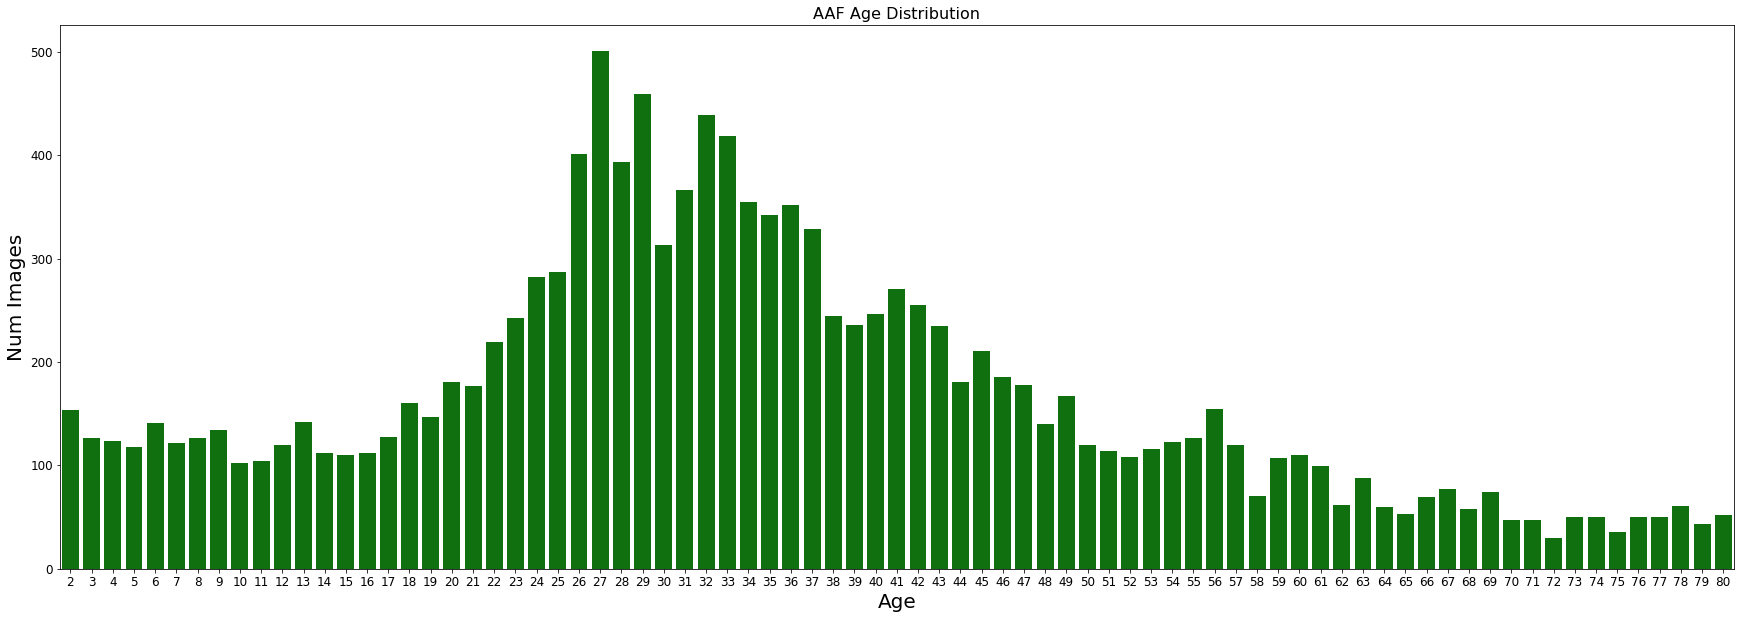

In [10]:
bar_plot(aaf_age_breakdown.index, 'Age', aaf_age_breakdown.values, 'Num Images', 'AAF Age Distribution')

The UTK dataset had a few issues with distribution.  The most obvious one is the enormous spike at age 26, it more than doubles any other category.  It also had moer images from ages 24 to 35 than any other age group.  When we get out past 70,  our sample size really decreases where any attempt to distinguish between age groups above 70 would be unachievable.

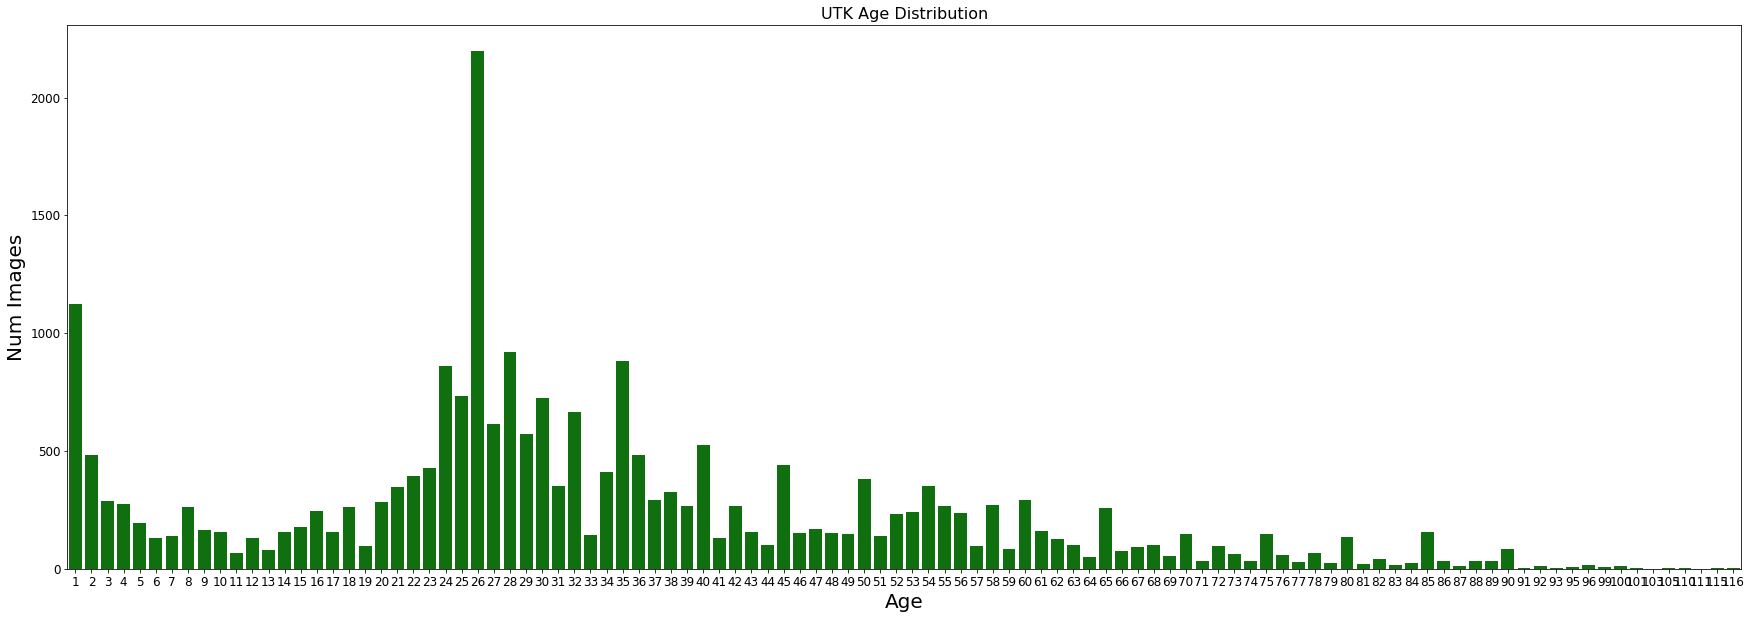

In [9]:
bar_plot(utk_age_breakdown.index, 'Age', utk_age_breakdown.values, 'Num Images', 'UTK Age Distribution')

When we combined the two datasets and removed ages under 2 and over 80, we still have a larger amount of images around the 20s which will impact how I divide the ages into groups.

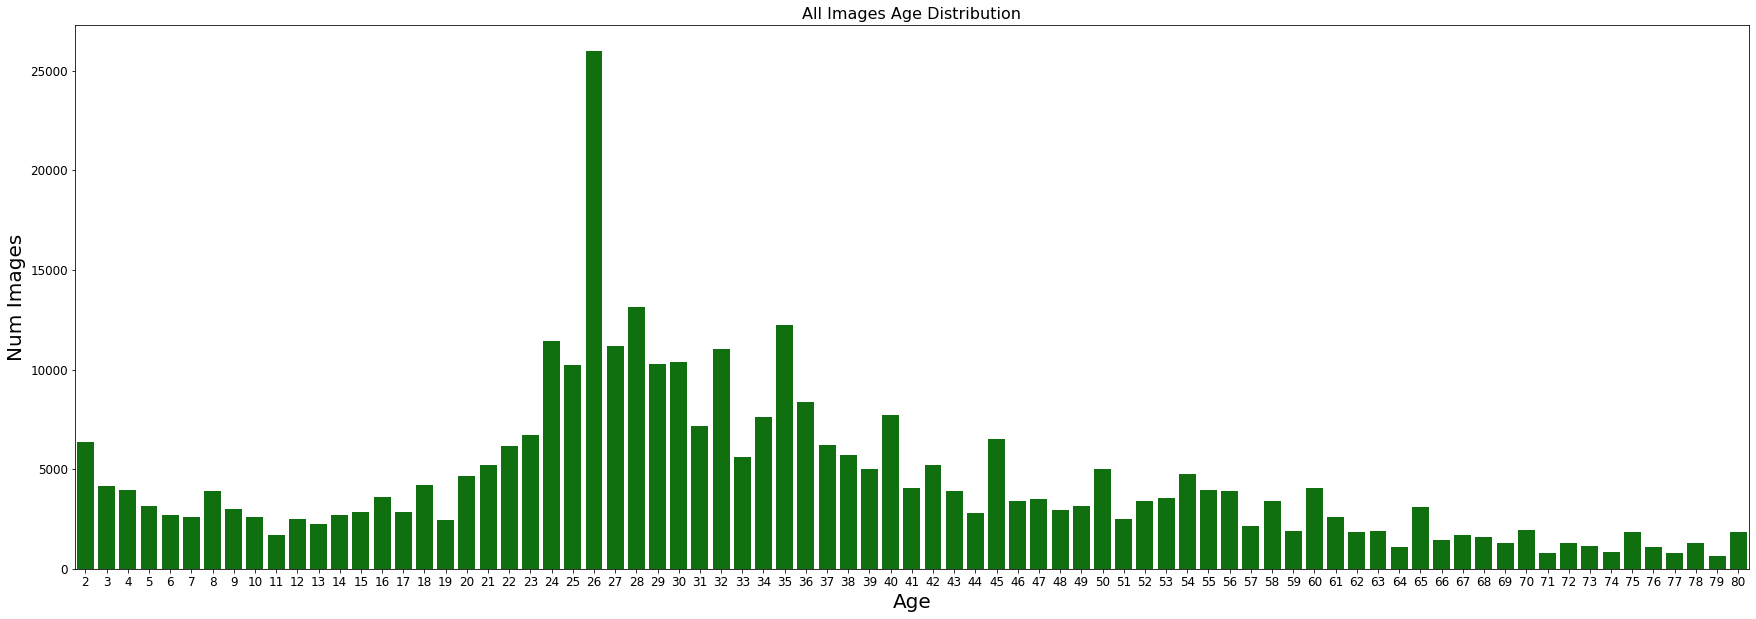

In [8]:
bar_plot(age_breakdown.index, 'Age', age_breakdown.values, 'Num Images', 'All Images Age Distribution')

In [11]:
group_breakdown = file_df_rep['Group'].value_counts()

A lot of trial and error went into dividing these groups up into groups with substaintial enough representation while remaining meaningful for application.  The group that I wish I could have broken up more is the 2 to 17 age group.  I feel like having groups 2 to 9 and 10 to 17 would have been much more applicable but it was already the 3rd smallest group and splitting it in half may have effected performance on esitmating between those two.

Even with these limitations we still get a great demographic breakdown here.  We have categories for minors, retirement age, early adulthood, late twenties and two middle age breakdowns.  To expand this project later, finding datasets that are more centered on the older and younger generations would help this current dataset be more even across groups.

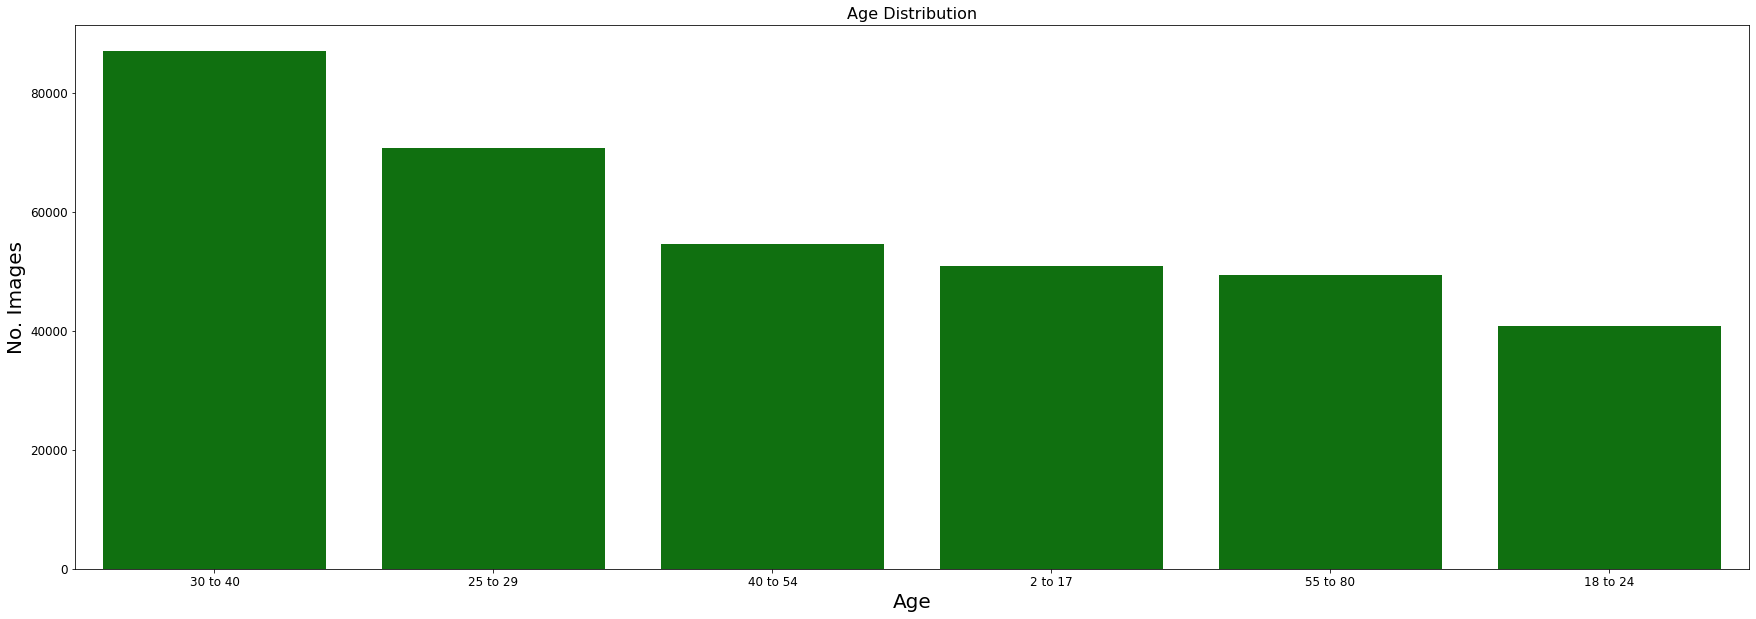

In [12]:
bar_plot(group_breakdown.index, "Age", group_breakdown.values, "No. Images")